Apply PCA to reduce dimensionality in modeling net migration into US counties.

Data come from [US Census](https://bit.ly/38PyfmR)

In [1]:
%run ./mobilityHelpers.ipynb
helpers = mobilityHelpers()

gdpFile = helpers.mFiles["gdp"]
piFile = helpers.mFiles["pi"]
hhiFile = helpers.mFiles["hhi"]
populationFile = helpers.mFiles["pop"]

C:\Users\alexg\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
popDF, popDFlong = helpers.getPopulationDynamicsData()
popDF.head()
popDFlong.head()

,state,county,county_state,value,year,metric
0,Alabama,Autauga,"Autauga, Alabama",54571.0,2010,CENSUSPOP
1,Alabama,Baldwin,"Baldwin, Alabama",182265.0,2010,CENSUSPOP
2,Alabama,Barbour,"Barbour, Alabama",27457.0,2010,CENSUSPOP
3,Alabama,Bibb,"Bibb, Alabama",22915.0,2010,CENSUSPOP
4,Alabama,Blount,"Blount, Alabama",57322.0,2010,CENSUSPOP


In [3]:
gdpDF, gdpDFlong = helpers.getGDPdata()
gdpDF.head()
gdpDFlong.tail()

,county,state,value,year,metric,county_state
24835,Sweetwater,Wyoming,6.583947,2018,GDP_LOG,"Sweetwater, Wyoming"
24836,Teton,Wyoming,6.335743,2018,GDP_LOG,"Teton, Wyoming"
24837,Uinta,Wyoming,5.957409,2018,GDP_LOG,"Uinta, Wyoming"
24838,Washakie,Wyoming,5.554009,2018,GDP_LOG,"Washakie, Wyoming"
24839,Weston,Wyoming,5.499529,2018,GDP_LOG,"Weston, Wyoming"


In [4]:
%run ./mobilityHelpers.ipynb
helpers = mobilityHelpers()
hhiDF, hhiDFlong = helpers.getHouseholdIncomeData()
hhiDFlong.head()

,county,state,county_state,year,value,metric
0,Jersey,Illinois,"Jersey, Illinois",2010,1.173144,mean_to_median_household_income_ratio
1,Jo Daviess,Illinois,"Jo Daviess, Illinois",2010,1.224985,mean_to_median_household_income_ratio
2,Johnson,Illinois,"Johnson, Illinois",2010,1.163771,mean_to_median_household_income_ratio
3,Kane,Illinois,"Kane, Illinois",2010,1.274337,mean_to_median_household_income_ratio
4,Kankakee,Illinois,"Kankakee, Illinois",2010,1.208422,mean_to_median_household_income_ratio


In [5]:
"""
concatenate hhi, gdp, and pop
"""
hhi_gdp_pop_long = pd.concat([gdpDFlong, hhiDFlong, popDFlong], sort=True).reset_index(drop=True)
hhi_gdp_pop_long.head()

,county,county_state,metric,state,value,year
0,Autauga,"Autauga, Alabama",GDP,Alabama,1518409.0,2015
1,Baldwin,"Baldwin, Alabama",GDP,Alabama,5345363.0,2015
2,Barbour,"Barbour, Alabama",GDP,Alabama,756590.0,2015
3,Bibb,"Bibb, Alabama",GDP,Alabama,358372.0,2015
4,Blount,"Blount, Alabama",GDP,Alabama,824934.0,2015


In [6]:
hhi_gdp_pop_long.tail()

,county,county_state,metric,state,value,year
538990,Sweetwater,"Sweetwater, Wyoming",RNETMIG,Wyoming,-17.065527,2019
538991,Teton,"Teton, Wyoming",RNETMIG,Wyoming,1.797445,2019
538992,Uinta,"Uinta, Wyoming",RNETMIG,Wyoming,-9.181105,2019
538993,Washakie,"Washakie, Wyoming",RNETMIG,Wyoming,-8.289759,2019
538994,Weston,"Weston, Wyoming",RNETMIG,Wyoming,2.599090,2019


In [7]:
hhi_gdp_pop_long["metric_year"] = hhi_gdp_pop_long["metric"] + hhi_gdp_pop_long["year"].astype("str")

# hhi_gdp_pop_df = hhi_gdp_pop_long.pivot_table(index=["county_state", "county", "state"],
#                                                columns=["metric_year"],
#                                         values=["value"]).reset_index(drop=False)

hhi_gdp_pop_df = hhi_gdp_pop_long.pivot_table(index=["county_state"],
                                               columns=["metric_year"],
                                        values=["value"]).reset_index(drop=False)
cols = ["COUNTY_STATE"]
cols.extend(list(hhi_gdp_pop_df.columns.levels[1][:-1]))
hhi_gdp_pop_df.columns = cols
hhi_gdp_pop_df.dropna(inplace=True)

hhi_gdp_pop_df.reset_index(drop=True, inplace=True)

hhi_gdp_pop_df.head()

,COUNTY_STATE,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,BIRTHS2016,BIRTHS2017,BIRTHS2018,...,mean_to_median_household_income_ratio2018,median_income__dollars2010,median_income__dollars2011,median_income__dollars2012,median_income__dollars2013,median_income__dollars2014,median_income__dollars2015,median_income__dollars2016,median_income__dollars2017,median_income__dollars2018
0,"Abbeville, South Carolina",65.0,229.0,280.0,273.0,242.0,247.0,227.0,217.0,237.0,...,1.403462,33143.0,34670.0,35067.0,35947.0,35409.0,34799.0,34652.0,35254.0,36685.0
1,"Accomack, Virginia",89.0,474.0,458.0,345.0,381.0,405.0,380.0,363.0,401.0,...,1.342189,41372.0,41595.0,40780.0,39328.0,39389.0,39412.0,38503.0,42260.0,43210.0
2,"Ada, Idaho",1310.0,5150.0,5032.0,5043.0,4986.0,5186.0,5074.0,4937.0,4946.0,...,1.342082,55835.0,55304.0,55499.0,55210.0,55805.0,56356.0,58099.0,60151.0,63137.0
3,"Adair, Iowa",10.0,66.0,80.0,68.0,72.0,63.0,72.0,75.0,90.0,...,1.309551,45202.0,47623.0,47872.0,47892.0,47264.0,46526.0,48765.0,49477.0,51859.0
4,"Adair, Kentucky",39.0,192.0,179.0,233.0,221.0,205.0,223.0,219.0,185.0,...,1.322574,29834.0,31775.0,31169.0,32524.0,34490.0,33362.0,33873.0,36575.0,39346.0


In [8]:
"""Identify columns to apply PCA to"""

cols = list(hhi_gdp_pop_df.columns)
myCols = ["COUNTY_STATE"]
myCols.extend([cc for cc in cols if "20" in cc])
myDF = hhi_gdp_pop_df.copy()
myCols
cols = [cc for cc in myCols if "20" in cc]
cols = [cc for cc in cols if "NETMIG" not in cc]
print(f"""We have {len(cols)} population-dynamics variables """
      f"""to use for modeling net migration into a county for each of the 10 years""")

n_comp_to_start_with = int(1.0/3 * len(cols))
print(f"""We are going to reduce it by identifying the """
      f"""primary components.  We will start with {n_comp_to_start_with}""")

We have 152 population-dynamics variables to use for modeling net migration into a county for each of the 10 years
We are going to reduce it by identifying the primary components.  We will start with 50


2015
We are going to reduce it by identifying the primary components for columns corresponding to 2015.  
      That makes 17
Of these 17, we will select the EigenValue outliers, to avoid overfitting the model


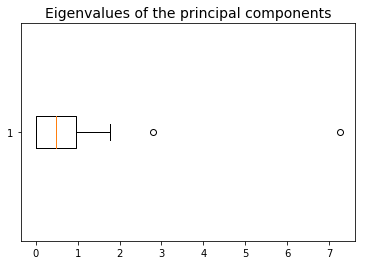

In this case, primary components are ones with eigenvalues >= 2.421681123145255
We have 2 primary principal components:
0: 7.264
1: 2.792


In [58]:
year = 2015

yrCols = [cc for cc in cols if str(year) in cc]
yrCols

print(year)
n_comp_to_start_with = len(yrCols)
print(f"""We are going to reduce it by identifying the """
      f"""primary components for columns corresponding to {year}.  
      That makes {n_comp_to_start_with}""")

"""Applying PCA for the year"""

%run ./mobilityHelpers.ipynb
helpers = mobilityHelpers(ctv_cutoff = 0.05)

"""Applying PCA for the year"""
pcPopDF, eigenvalues = helpers.applyPCA(hhi_gdp_pop_df, yrCols, n_comp_to_start_with, 
                                        identify_outliers=True,
                                        beta_outliers=1.50,
                                        tolerance=-1.0,
                                        remove_most_frequent=False,
                                        verbose=False
                                       )

In [63]:
list(pcPopDF.columns)

['COUNTY_STATE',
 'BIRTHS2010',
 'BIRTHS2011',
 'BIRTHS2012',
 'BIRTHS2013',
 'BIRTHS2014',
 'BIRTHS2015',
 'BIRTHS2016',
 'BIRTHS2017',
 'BIRTHS2018',
 'BIRTHS2019',
 'CENSUSPOP2010',
 'DEATHS2010',
 'DEATHS2011',
 'DEATHS2012',
 'DEATHS2013',
 'DEATHS2014',
 'DEATHS2015',
 'DEATHS2016',
 'DEATHS2017',
 'DEATHS2018',
 'DEATHS2019',
 'DOMESTICMIG2010',
 'DOMESTICMIG2011',
 'DOMESTICMIG2012',
 'DOMESTICMIG2013',
 'DOMESTICMIG2014',
 'DOMESTICMIG2015',
 'DOMESTICMIG2016',
 'DOMESTICMIG2017',
 'DOMESTICMIG2018',
 'DOMESTICMIG2019',
 'ESTIMATESBASE2010',
 'GDP2015',
 'GDP2016',
 'GDP2017',
 'GDP2018',
 'GDP_LOG2015',
 'GDP_LOG2016',
 'GDP_LOG2017',
 'GDP_LOG2018',
 'INTERNATIONALMIG2010',
 'INTERNATIONALMIG2011',
 'INTERNATIONALMIG2012',
 'INTERNATIONALMIG2013',
 'INTERNATIONALMIG2014',
 'INTERNATIONALMIG2015',
 'INTERNATIONALMIG2016',
 'INTERNATIONALMIG2017',
 'INTERNATIONALMIG2018',
 'INTERNATIONALMIG2019',
 'NATURALINC2010',
 'NATURALINC2011',
 'NATURALINC2012',
 'NATURALINC2013',
 'NAT

In [10]:
yrCols

['BIRTHS2015',
 'DEATHS2015',
 'DOMESTICMIG2015',
 'GDP2015',
 'GDP_LOG2015',
 'INTERNATIONALMIG2015',
 'NATURALINC2015',
 'NPOPCHG_2015',
 'POPESTIMATE2015',
 'RBIRTH2015',
 'RDEATH2015',
 'RDOMESTICMIG2015',
 'RINTERNATIONALMIG2015',
 'RNATURALINC2015',
 'mean_income__dollars2015',
 'mean_to_median_household_income_ratio2015',
 'median_income__dollars2015']

In [11]:
hhi_gdp_pop_df.head()

,COUNTY_STATE,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,BIRTHS2016,BIRTHS2017,BIRTHS2018,...,mean_to_median_household_income_ratio2018,median_income__dollars2010,median_income__dollars2011,median_income__dollars2012,median_income__dollars2013,median_income__dollars2014,median_income__dollars2015,median_income__dollars2016,median_income__dollars2017,median_income__dollars2018
0,"Abbeville, South Carolina",65.0,229.0,280.0,273.0,242.0,247.0,227.0,217.0,237.0,...,1.403462,33143.0,34670.0,35067.0,35947.0,35409.0,34799.0,34652.0,35254.0,36685.0
1,"Accomack, Virginia",89.0,474.0,458.0,345.0,381.0,405.0,380.0,363.0,401.0,...,1.342189,41372.0,41595.0,40780.0,39328.0,39389.0,39412.0,38503.0,42260.0,43210.0
2,"Ada, Idaho",1310.0,5150.0,5032.0,5043.0,4986.0,5186.0,5074.0,4937.0,4946.0,...,1.342082,55835.0,55304.0,55499.0,55210.0,55805.0,56356.0,58099.0,60151.0,63137.0
3,"Adair, Iowa",10.0,66.0,80.0,68.0,72.0,63.0,72.0,75.0,90.0,...,1.309551,45202.0,47623.0,47872.0,47892.0,47264.0,46526.0,48765.0,49477.0,51859.0
4,"Adair, Kentucky",39.0,192.0,179.0,233.0,221.0,205.0,223.0,219.0,185.0,...,1.322574,29834.0,31775.0,31169.0,32524.0,34490.0,33362.0,33873.0,36575.0,39346.0


In [64]:
"""
Get contribution to variance (CTV) by applying Random-Forest Regression.  Use 0.055 for cutoff
"""
xVars = [yc for yc in yrCols if \
         ("MIG" not in yc) and \
         ("NPOP" not in yc) and \
         ("INC" not in yc) and \
         ("LOG" not in yc) and \
         ("RDEATH" not in yc) and \
         ("RBIRTH" not in yc)
        ]
# xVars = [yc for yc in yrCols if "income" in yc]
xVars = ["pc_" + str(ii) for ii in range(len(eigenvalues))]
print(f"""Applying RF regression for {len(xVars)} possible input variables """
      f"""to identify important ones.  Using CTV cutoff = {helpers.mCTVcutoff}""")
# print(xVars)
%run ./mobilityHelpers.ipynb
helpers = mobilityHelpers(ctv_cutoff = 0.045)
myXs4Regression, rfr_hhi_gdp_pop_df = helpers.fitRFR(pcPopDF,
                                 yVarBase="NETMIG",
                                 xVars=xVars, #["pc_" + str(ii) for ii in range(len(eigenvalues))],
                                 year=year,
                                 ctv_cutoff=helpers.mCTVcutoff,
                                 n_rfr_trees=100,
                                 verbose=True,
                                )

for xx in myXs4Regression:
    print(xx)

Applying RF regression for 2 possible input variables to identify important ones.  Using CTV cutoff = 0.045
Feature Importances (contributions to variance):
pc_0:  0.613
pc_1:  0.387
Identified important features (CTV cutoff = 0.045)

pc_0:  0.613
pc_1:  0.387

RFR R^2 with identified features:  1.000
pc_0
pc_1


In [71]:
myXs4Regression, rfr_hhi_gdp_pop_df = helpers.fitRFR(pcPopDF,
                                 yVarBase="INTERNATIONALMIG",
                                 xVars=xVars, #["pc_" + str(ii) for ii in range(len(eigenvalues))],
                                 year=year,
                                 ctv_cutoff=helpers.mCTVcutoff,
                                 n_rfr_trees=100,
                                 verbose=True,
                                )

for xx in myXs4Regression:
    print(xx)

Feature Importances (contributions to variance):
pc_0:  0.856
pc_1:  0.144
Identified important features (CTV cutoff = 0.045)

pc_0:  0.856
pc_1:  0.144

RFR R^2 with identified features:  1.000
pc_0
pc_1


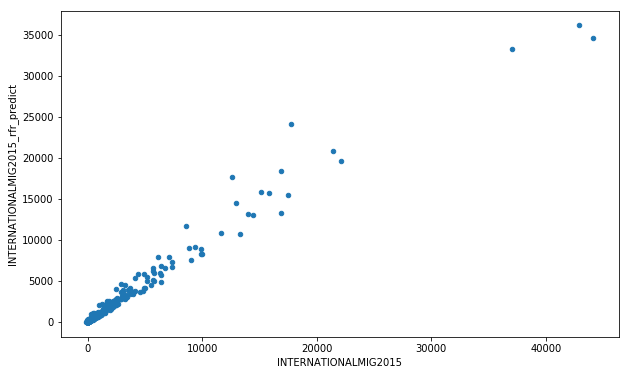

In [72]:
rfr_hhi_gdp_pop_df.plot.scatter(x="INTERNATIONALMIG" + str(year), 
                                y="INTERNATIONALMIG" + str(year) + "_rfr_predict",
                                figsize=(10, 6)
                               )
plt.show()

Applying linear regression using only the important principal components
DOMESTICMIG2015 ~ 
pc_0 + pc_1
DOMESTICMIG2015 ~ pc_0 + pc_1
                            OLS Regression Results                            
Dep. Variable:        DOMESTICMIG2015   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     282.9
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          2.82e-113
Time:                        20:11:54   Log-Likelihood:                -27738.
No. Observations:                2998   AIC:                         5.548e+04
Df Residuals:                    2995   BIC:                         5.550e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.97

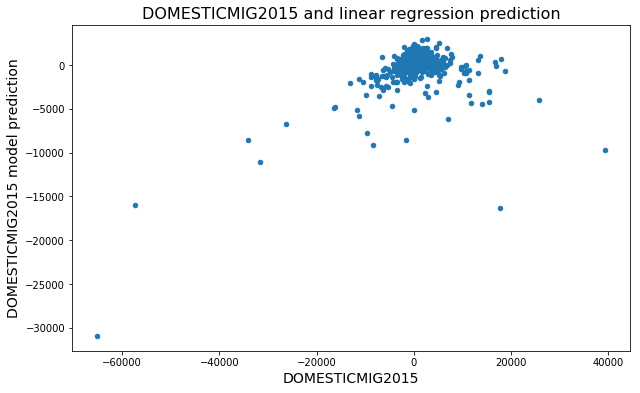

In [76]:
%run ./mobilityHelpers.ipynb
helpers = mobilityHelpers()

print(f"""Applying linear regression using only the important principal components""")
pPopDFreg = helpers.applyLinearRegression(pcPopDF,
                                          importantXs=myXs4Regression,
                                          yVarBase="DOMESTICMIG",
                                          year=year,
                                          verbose=True,
                                          showplots=True,
                                         )


In [ ]:
for year in range (2010, 2020):
    yrCols = [cc for cc in cols if str(year) in cc]
    yrCols

    print(year)
    n_comp_to_start_with = len(yrCols)
    print(f"""We are going to reduce it by identifying the """
          f"""primary components for columns corresponding to {year}.  
          That makes {n_comp_to_start_with}""")

    """Applying PCA for the year"""

    %run ./mobilityHelpers.ipynb
    helpers = mobilityHelpers(ctv_cutoff = 0.05)

    """Applying PCA for the year"""
    pcPopDF, eigenvalues = helpers.applyPCA(myDF, yrCols, n_comp_to_start_with, 
                                            identify_outliers=False,
                                            beta_outliers=-3.0,
                                            tolerance=-1.0,
                                            remove_most_frequent=False,
                                            verbose=False
                                           )
    """
    Get contribution to variance (CTV) by applying Random-Forest Regression.  Use 0.055 for cutoff
    """
    print(f"""Applying RF regression for {len(eigenvalues)} principal components"""
          f"""to identify important ones.  Using CTV cutoff = {helpers.mCTVcutoff}""")
    myXs4Regression = helpers.fitRFR(pcPopDF,
                                     yVarBase="NETMIG",
                                     xVars=["pc_" + str(ii) for ii in range(len(eigenvalues))],
                                     year=2010,
                                     ctv_cutoff=helpers.mCTVcutoff,
                                     n_rfr_trees=100,
                                     verbose=True,
                                    )

    #     myXs4Regression

    %run ./mobilityHelpers.ipynb
    helpers = mobilityHelpers()
    
    print(f"""Applying linear regression using only the important principal components""")
    pPopDFreg = helpers.applyLinearRegression(pcPopDF,
                                              importantXs=myXs4Regression,
                                              yVarBase="NETMIG",
                                              year=year,
                                              verbose=True,
                                              showplots=True,
                                             )

   
    

In [ ]:
csvOut = populationFile.replace(".csv", "_modeled_analyzed.csv")
pcPopDF.to_csv(csvOut, index=False)
print(f"""Saved the data into {csvOut}""")

TODO:

1. Set up tracking of PCs for each year
2. Add economic data (GDP, income, and mean-median income ratios) and repeat the PCA -> regression.
3. DONE: Compare results of linear and RF regression
4. DONE: Group by years: a separate set of PCAs for 2010, 2011, ..., 2019.
5. Add expression of the features from PCs.